# Part I - US Flights Exploration
#### Code written by Ali

## Introduction
	
This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays, from 2007 to 2008.


## Preliminary Wrangling


Importing all packages and set plots to be embedded inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

### Loading in Flight Data

Loading in data and identifying size of each df

The following is the description of the flight data df's:
- Year; Month; DayofMonth; DayOfWeek - date of departure

- DepTime - Gate departure time is the instance when the pilot releases the aircraft parking brake after passengers have loaded and aircraft doors have been closed.

- CRS - Computer Reservation System. CRS provide information such as airline schedules to travel agencies and allow agents.

- Actual Arrival Times - Gate arrival time is the instance when the pilot sets the aircraft parking brake after arriving at the airport gate or passenger unloading area.

- Actual Departure Times - Gate departure time is the instance when the pilot releases the aircraft parking brake after passengers have loaded and aircraft doors have been closed.

- Airline ID - An identification number assigned by US DOT to identify a unique airline (carrier).

In [3]:
a2007 = pd.read_csv('2007.csv')

In [4]:
a2007.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4,11,0,NaN,0,0,0,0,0,0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5,6,0,NaN,0,0,0,0,0,0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6,9,0,NaN,0,3,0,0,0,31
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3,8,0,NaN,0,23,0,0,0,3
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3,9,0,NaN,0,0,0,0,0,0


7453215 rows and 29 columns

In [5]:
a2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7453215 entries, 0 to 7453214
Data columns (total 29 columns):
Year                 int64
Month                int64
DayofMonth           int64
DayOfWeek            int64
DepTime              float64
CRSDepTime           int64
ArrTime              float64
CRSArrTime           int64
UniqueCarrier        object
FlightNum            int64
TailNum              object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin               object
Dest                 object
Distance             int64
TaxiIn               int64
TaxiOut              int64
Cancelled            int64
CancellationCode     object
Diverted             int64
CarrierDelay         int64
WeatherDelay         int64
NASDelay             int64
SecurityDelay        int64
LateAircraftDelay    int64
dtypes: float64(7), int64(17), object(5)
memory usage: 1.6+ GB


- Flight Number should be a string or categorical column
- Columns such as Departure and Arrival Times should be in time format.

In [6]:
b2008 = pd.read_csv('2008.csv')

#b2008.head()

2389217 rows and 29 columns. Many more data points in 2007, maybe due to the financial crisis

### Wrangling

Concatinating the data frames

In [7]:
df = pd.concat([a2007, b2008])

In [8]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


In [9]:
cancellation_value_counts = df.CancellationCode.value_counts()
cancellation_value_counts

A    92854
B    87680
C    44612
D       45
Name: CancellationCode, dtype: int64

Creating a subset of the df which only contains the cancellation dates

In [23]:
df_cancellation = df.query('CancellationCode in ["A","B","C","D"]')

In [9]:
df_cancellation.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
38,2007,1,1,1,NaN,2030,NaN,2135,WN,2734,0,NaN,65.0,NaN,NaN,NaN,SNA,LAS,226,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
325,2007,1,2,2,NaN,2025,NaN,2115,WN,100,0,NaN,50.0,NaN,NaN,NaN,AUS,DAL,189,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
828,2007,1,2,2,NaN,2020,NaN,2110,WN,213,0,NaN,50.0,NaN,NaN,NaN,DAL,AUS,189,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
847,2007,1,2,2,NaN,730,NaN,830,WN,3,0,NaN,60.0,NaN,NaN,NaN,DAL,HOU,239,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
851,2007,1,2,2,NaN,930,NaN,1030,WN,11,0,NaN,60.0,NaN,NaN,NaN,DAL,HOU,239,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0


Creating a subset of data to analyse departure delay

In [24]:
df_dep_delay = df[df.DepDelay>0]

In [10]:
df_dep_delay.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


### What is the structure of your dataset?

The dataset contains 9,842,432 rows and 29 columns

### What are the main feature(s) of interest in your dataset?
The dataset contains numerous columns of interest, some features which could be identified are as followed:
- Departure delay could be used to identify which airports often have delays on departure
- This could also be filtered to check on average which airports have the longest departures
- The distance could also be tracked, to see which airlines travel the furthest
- Weather delay could also be checked to see which aiport has the most common delays due to this
- Similarly, could also be done for carrier and security delays
- A check could be done to see which airport has the most cancellations


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Cancellation code may be the most useful feature in determining a pattern/ reason why flights are often cancelled.

## Univariate Exploration

In this section, I will investigate distributions of individual variables.
If I see unusual points or outliers, I will take a deeper look to clean things up
and prepare myself to look at relationships between variables.


#### Checking day of week column to see most common days of travel

In [34]:
def discrete_plot(lowbin, upperbin, incrementbin, column):
    bin_edges = np.arange(lowbin, upperbin, incrementbin)
    plt.hist(data = df, x=column, bins=bin_edges, edgecolor='black', linewidth=1.2);
    plt.ylabel('Frequency')
    plt.title('Graph to show the frequency of flights on which day between 2007-08')
    plt.legend()

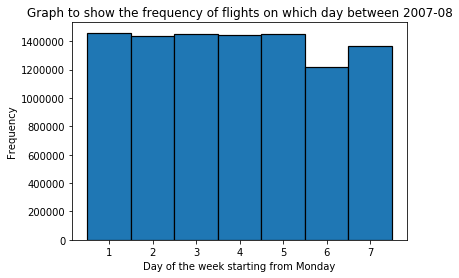

In [15]:
discrete_plot(0.5, 8.5, 1, df.DayOfWeek)
plt.xlabel('Day of the week starting from Monday');

- The data clearly shows most flights were on weekdays.
- Saturday is the least common day for flights to be scheduled

#### Checking Day of the Month is the most common day to travel

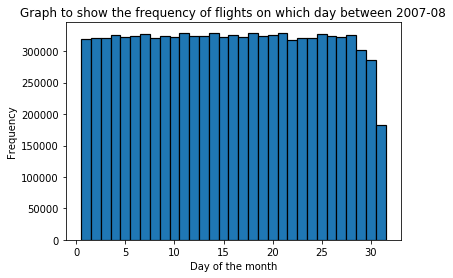

In [16]:
discrete_plot(0.5, 32.5, 1, df.DayofMonth);
plt.xlabel('Day of the month');

In [17]:
df.DayofMonth.value_counts().head()

18    329406
21    328556
14    328263
11    328248
7     327969
Name: DayofMonth, dtype: int64

The graph should a uniform trend over the first 28 days as these are the 28 common days across all months. The 18st day is the most common day of travel within the date intervals.

#### Cancellation distribution across the different months

In [78]:
month_order = df_cancellation.Month.unique()

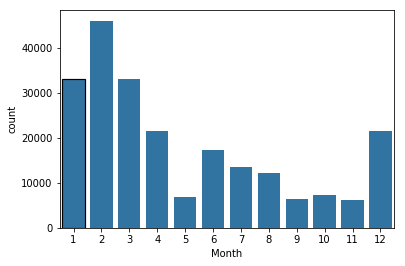

In [81]:
sb.countplot(data = df_cancellation, x='Month', linewidth=1.2, color=base_color, order=month_order);

February despite having the fewest number of days has the most cancellations

#### Distance of flight distribution

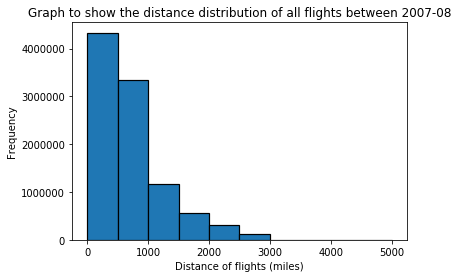

In [35]:
discrete_plot(0, df.Distance.max()+500, 500, df.Distance)
plt.title('Graph to show the distance distribution of all flights between 2007-08');
plt.xlabel('Distance of flights (miles)');

Most flights were short ranged however some flights were over large distances perhaps going to different countrties such as the UK or Qatar.

#### Most common cancellation type

In [18]:
#Creating base colour for univariate graphs
base_color=sb.color_palette()[0]

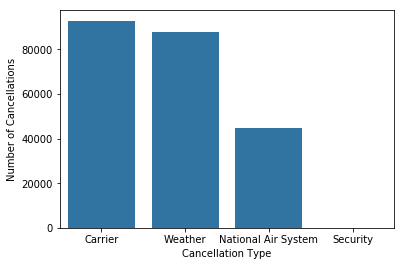

In [19]:
fig = sb.countplot(data=df, x='CancellationCode', color=base_color,order=['A','B','C','D'])

fig.set(xlabel='Cancellation Type', ylabel='Number of Cancellations')
fig.set_xticklabels(['Carrier','Weather','National Air System','Security']);

In [20]:
cancellation_index_table = cancellation_value_counts.reset_index(name="counts")

In [21]:
cancellation_index_table

,index,counts
0,A,92854
1,B,87680
2,C,44612
3,D,45


- Carrier cancellation were the most common type of cancellation at almost 10k cancellations
- There were very few cancellations due to security issues

#### Top 10 Airline Carriers Which Ended Up Cancelling

Recalling the sub table containing all cancellation rows

In [22]:
df_cancellation.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
38,2007,1,1,1,NaN,2030,NaN,2135,WN,2734,0,NaN,65.0,NaN,NaN,NaN,SNA,LAS,226,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
325,2007,1,2,2,NaN,2025,NaN,2115,WN,100,0,NaN,50.0,NaN,NaN,NaN,AUS,DAL,189,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
828,2007,1,2,2,NaN,2020,NaN,2110,WN,213,0,NaN,50.0,NaN,NaN,NaN,DAL,AUS,189,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
847,2007,1,2,2,NaN,730,NaN,830,WN,3,0,NaN,60.0,NaN,NaN,NaN,DAL,HOU,239,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0
851,2007,1,2,2,NaN,930,NaN,1030,WN,11,0,NaN,60.0,NaN,NaN,NaN,DAL,HOU,239,0.0,0.0,1,A,0,0.0,0.0,0.0,0.0,0.0


Plotting top 10 airline carries who cancelled their flights

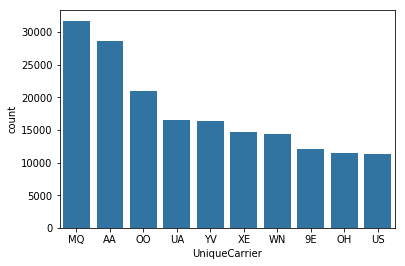

In [23]:
sb.countplot(data=df_cancellation, 
             x="UniqueCarrier", 
             color=base_color,
             order=pd.value_counts(df_cancellation['UniqueCarrier']).iloc[:10].index
            );

The two main airlines to cancel were MQ(Envoy Air), AA(American Airlines).

#### Checking to the the most common departure airports

In [24]:
flight_origin = df.Origin.value_counts()
largest_origin = flight_origin.nlargest(n=10)

In [25]:
largest_origin_index = largest_origin.reset_index()
largest_origin_index

,index,Origin
0,ATL,550865
1,ORD,493792
2,DFW,390386
3,DEN,319312
4,LAX,311077
5,PHX,280476
6,IAH,262969
7,LAS,243321
8,DTW,233658
9,EWR,203051


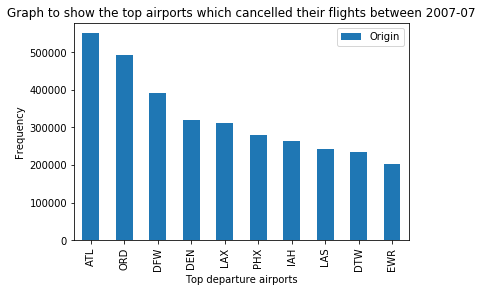

In [26]:
largest_origin_index.plot.bar(x="index", y="Origin", color=base_color);
plt.xlabel('Top departure airports')
plt.ylabel('Frequency')
plt.title('Graph to show the top airports which cancelled their flights between 2007-07');


Atalanta airport is by far the largest airport to depart from

#### Departure delay distribution

In [27]:
df_dep_delay.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2007,1,1,1,1232.0,1225,1341.0,1340,WN,2891,N351,69.0,75.0,54.0,1.0,7.0,SMF,ONT,389,4.0,11.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
1,2007,1,1,1,1918.0,1905,2043.0,2035,WN,462,N370,85.0,90.0,74.0,8.0,13.0,SMF,PDX,479,5.0,6.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0
2,2007,1,1,1,2206.0,2130,2334.0,2300,WN,1229,N685,88.0,90.0,73.0,34.0,36.0,SMF,PDX,479,6.0,9.0,0,NaN,0,3.0,0.0,0.0,0.0,31.0
3,2007,1,1,1,1230.0,1200,1356.0,1330,WN,1355,N364,86.0,90.0,75.0,26.0,30.0,SMF,PDX,479,3.0,8.0,0,NaN,0,23.0,0.0,0.0,0.0,3.0
4,2007,1,1,1,831.0,830,957.0,1000,WN,2278,N480,86.0,90.0,74.0,-3.0,1.0,SMF,PDX,479,3.0,9.0,0,NaN,0,0.0,0.0,0.0,0.0,0.0


Text(0.5,1,'Graph to show how often departure delays occured between 2007-08')

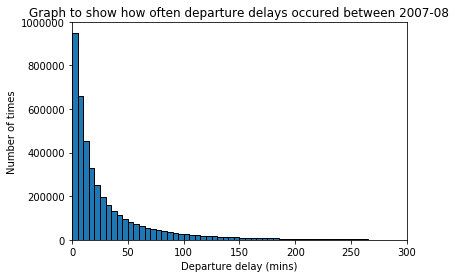

In [28]:
bins = np.arange(0, df_dep_delay['DepDelay'].max()+5, 5);

plt.hist(data=df_dep_delay , x='DepDelay', bins=bins, edgecolor='black');
plt.xlim(0,300) #only greater than 0 otherwise it's not a delay
plt.xlabel('Departure delay (mins)')
plt.ylabel('Number of times')
plt.title('Graph to show how often departure delays occured between 2007-08')


Graph shows most results lie less than 20

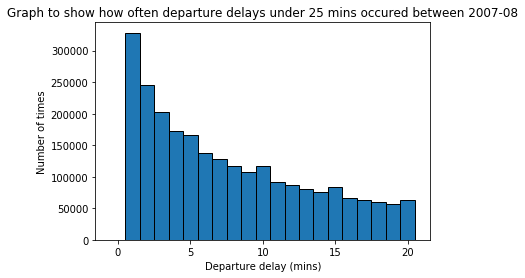

In [31]:
bins = np.arange(-0.5, 21.5, 1) #shifting start points to keep float values in centre
#Bins of 1 was used as delay time is an integer

plt.hist(data=df_dep_delay , x='DepDelay', bins=bins, edgecolor='black');
plt.xlabel('Departure delay (mins)');
plt.ylabel('Number of times');
plt.title('Graph to show how often departure delays under 25 mins occured between 2007-08');


### Summary of univariate exploration

Results seem in line with expectations. Most departure delays occur within the first 10 minutes. Atalanta airport was the airport with the highest number of cancellations. February, despite having the least number of days in the month was the month with the highest number of flights.

## Bivariate Exploration

In this section I will investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### What was the average flight distance over the different years

/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


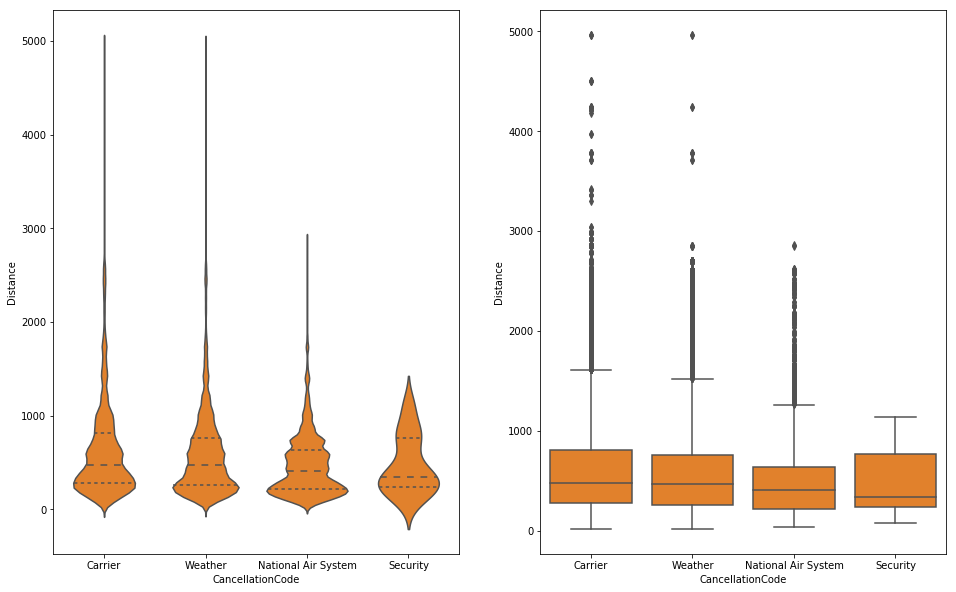

In [30]:
plt.figure(figsize = [16, 10])
plt.subplot(1, 2, 1)
sb.violinplot(data=df , x='CancellationCode' , y='Distance', inner='quartile', color=sb.color_palette()[1]);

plt.subplot(1, 2, 2)
sb.boxplot(data=df , x='CancellationCode' , y='Distance', color=sb.color_palette()[1]);
#Coloured orange to see quartile lines more clearly

plt.subplot(1, 2, 1).set_xticklabels(['Carrier','Weather','National Air System','Security']);
plt.subplot(1, 2, 2).set_xticklabels(['Carrier','Weather','National Air System','Security']);

- Interesting to see that carrier cancellations had many small long distance trips which may mean that airlines may not want often cancel long distance flights due to carrier issues
- The distance distribution shows that weather and carrier cancellations are almost identical
- Security cancellations tend to be over small journey flights

#### What is the relationship between the departure and arrival delays

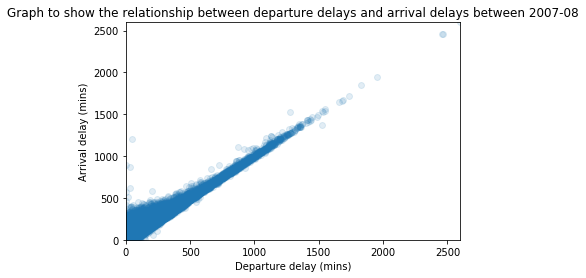

In [31]:
plt.scatter(data=df_dep_delay, x='DepDelay', y='ArrDelay', alpha = 1/8);
plt.xlabel('Departure delay (mins)')
plt.xlim(-1, df_dep_delay['DepDelay'].max()) #only greater than 0 otherwise it's not a delay

plt.ylabel('Arrival delay (mins)')
plt.ylim(-1, df_dep_delay['ArrDelay'].max()) #only greater than 0 otherwise it's not a delay

plt.title('Graph to show the relationship between departure delays and arrival delays between 2007-08');

Graph still difficult to see. A heatmap would be useful to identify the trend of the darker regions to see where the large majority of the data lies.

### Summary of Bivariate Exploration

#### What are some of the relationships you observed in this part of the investigation? How did the features of interest vary with other features in the dataset?
It is interesting to see the distributions of the cancellation codes and distance are greatly concentrated over shorter flights. Security has no outlier points in the longer distance flights suggesting it is not the cause cancelling long distance flights.


## Multivariate Exploration

In this section I will create plots of three or more variables to investigate my data further.
First I will create a correlation matrix to identify any underlying trends in the data.

#### Colourbar/ Density graph illustrating the relationship between the departure and arrival delays

This is the same graph as above however plotting as a heatmap to identify where the majority of the datapoints lie.

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


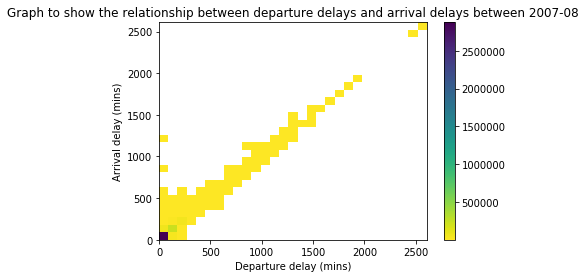

In [32]:
bin_x = np.arange(0, df_dep_delay['DepDelay'].max()+90, 90)
bin_y = np.arange(0, df_dep_delay['ArrDelay'].max()+90, 90)
plt.hist2d(data=df_dep_delay, x='DepDelay', y='ArrDelay', bins = [bin_x, bin_y], cmap = 'viridis_r', cmin = 1);
plt.colorbar();

plt.xlabel('Departure delay (mins)')
plt.ylabel('Arrival delay (mins)')
plt.title('Graph to show the relationship between departure delays and arrival delays between 2007-08');

Graph illustrates a very linear relationship between departure and arrival delays. Surprising to see that airlines do not speed up to try and reduce arrival delays however other factors maybe at play.
The only outlier trend is that some arrival delays occur when there is little to no departure delays.

Since the density of the plot is higher below the 500 minute mark, I will plot a sample to further analyse.

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:968: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


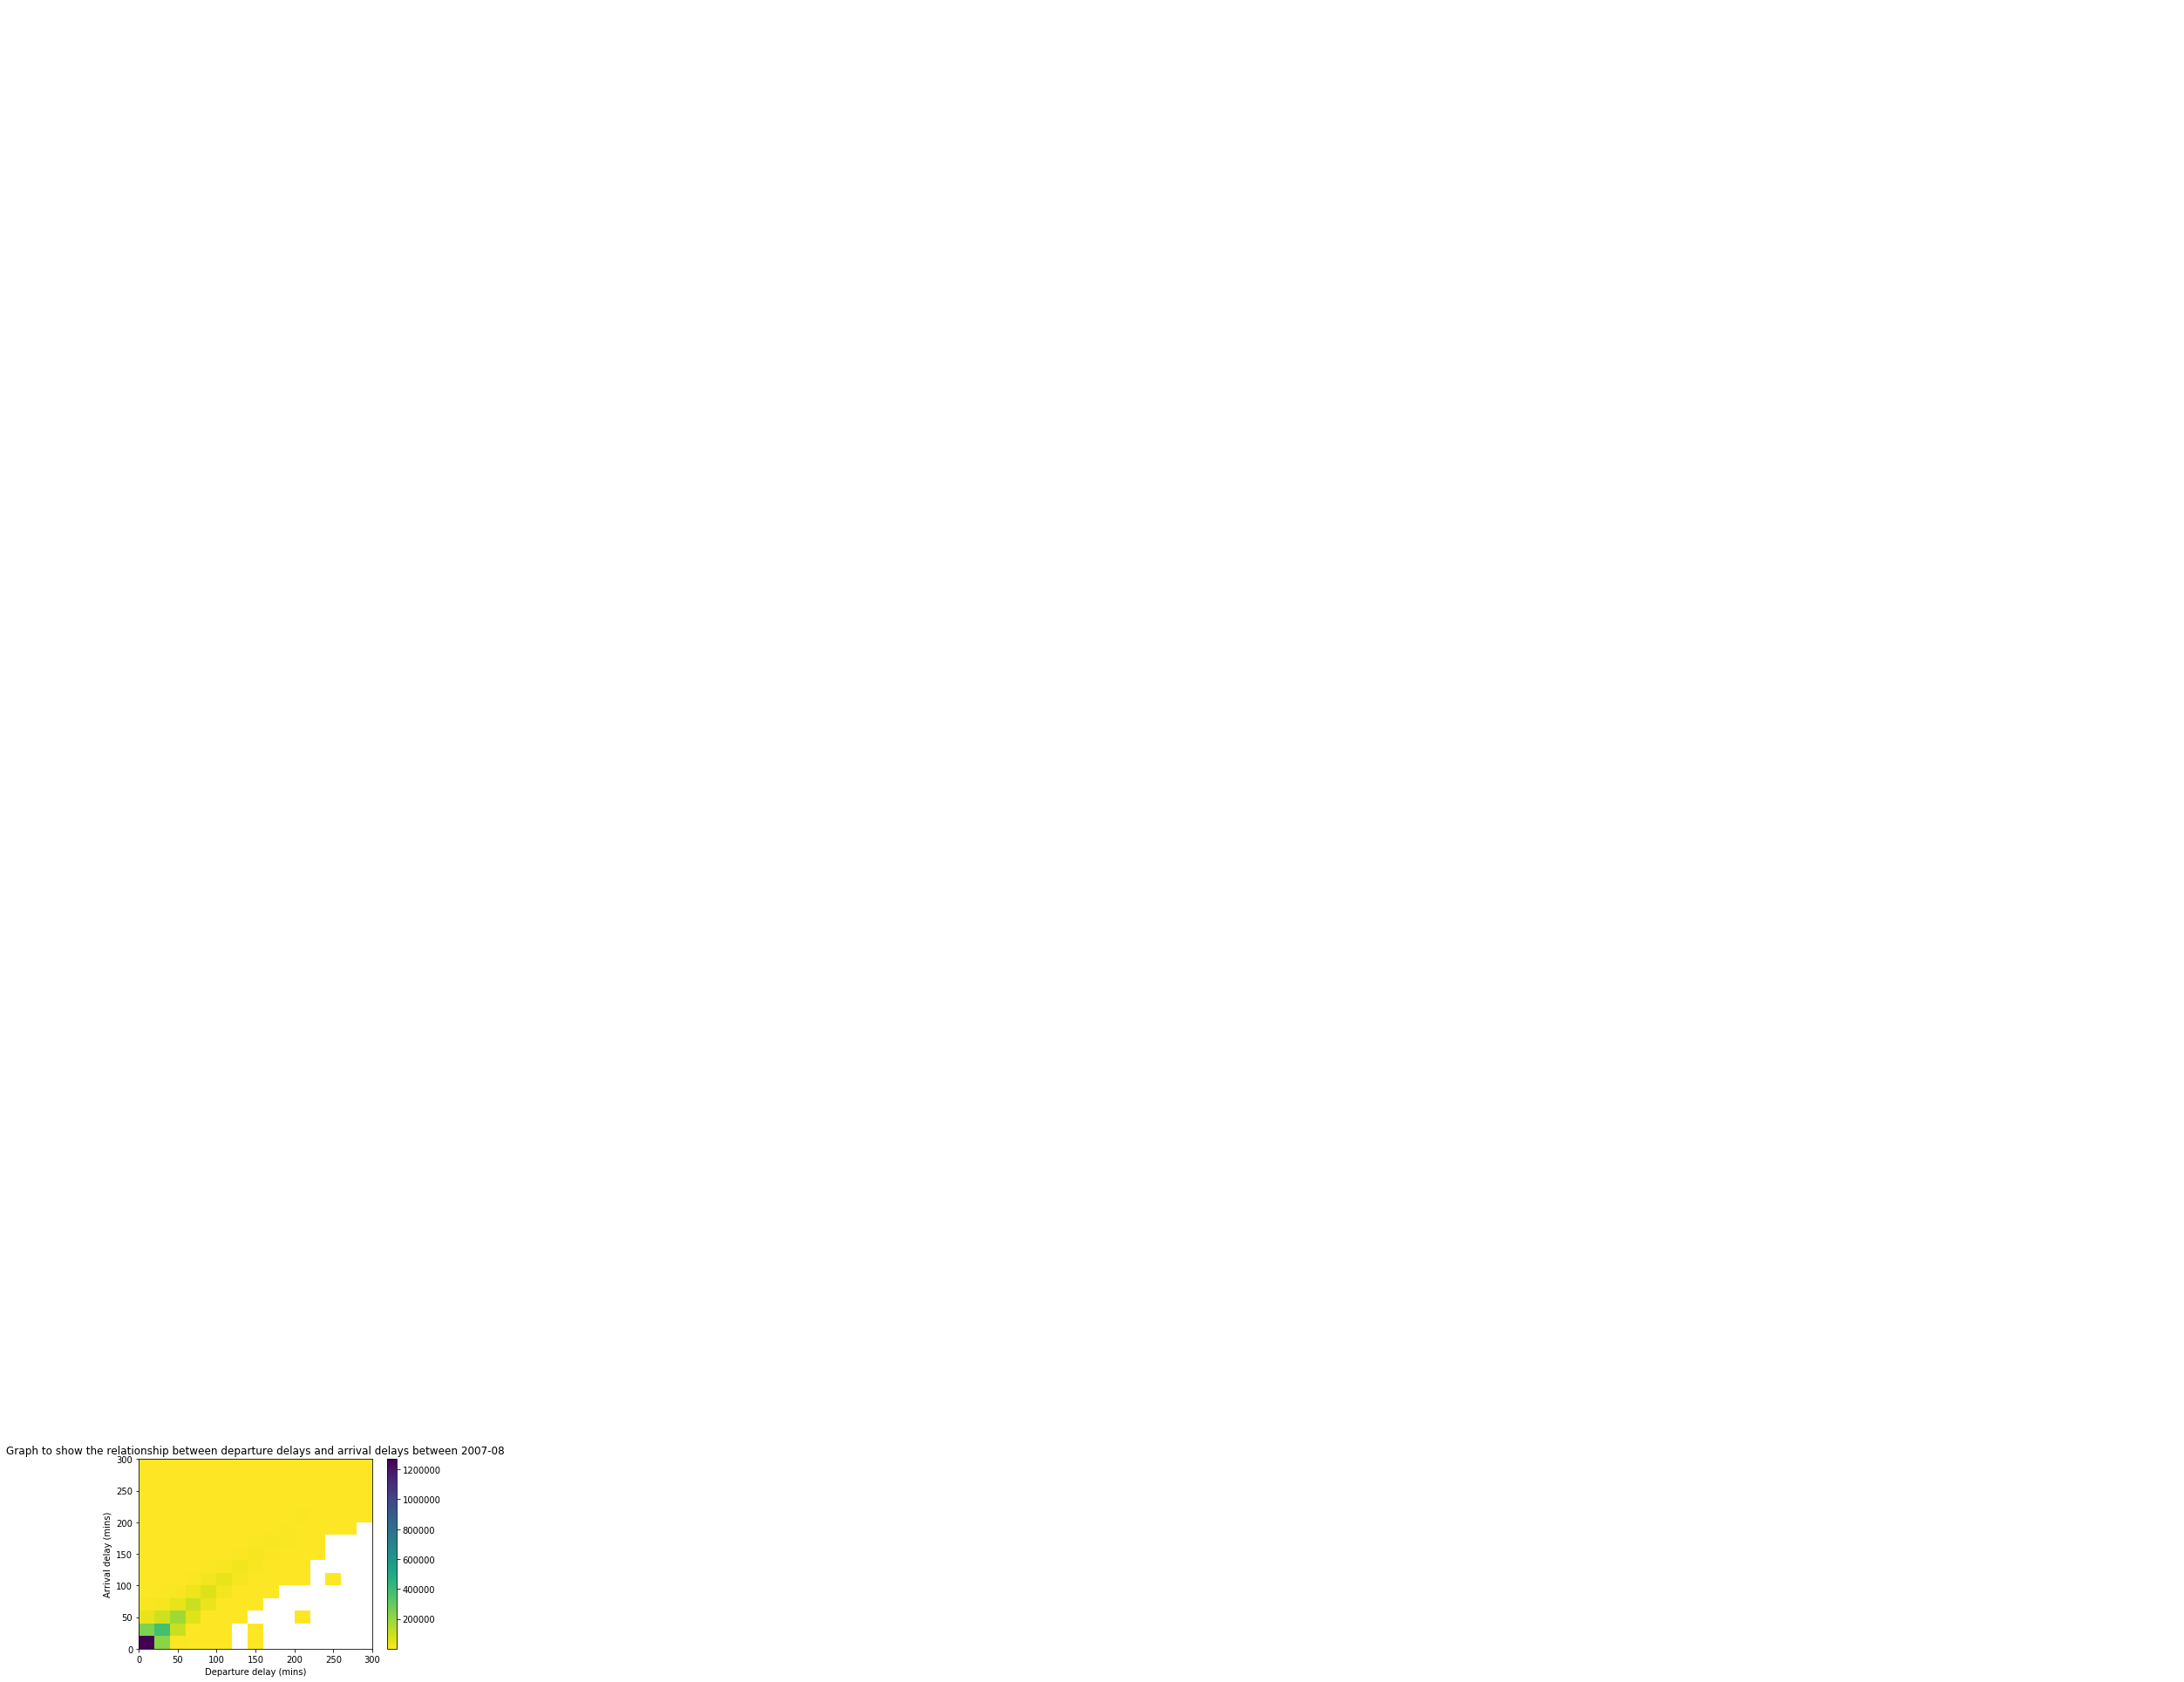

In [25]:
bin_x = np.arange(0, df_dep_delay['DepDelay'].max()+20, 20);
bin_y = np.arange(0, df_dep_delay['ArrDelay'].max()+20, 20);
plt.hist2d(data=df_dep_delay, x='DepDelay', y='ArrDelay', bins = [bin_x, bin_y], cmap = 'viridis_r', cmin = 1);
plt.colorbar();

plt.xlim(0, 300);
plt.ylim(0,300);
plt.xlabel('Departure delay (mins)');
plt.ylabel('Arrival delay (mins)');
plt.title('Graph to show the relationship between departure delays and arrival delays between 2007-08');


Graph shows if there is a departure delay, there is likely to be a slightly longer arrival delay

#### Correlation Matrix

Test to see late aircrafts have any relationship with flight distance

In [26]:
hm_columns = ['Distance', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

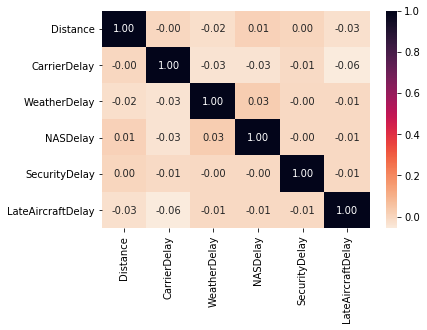

In [32]:
sb.heatmap(df_dep_delay[hm_columns].corr(), cmap='rocket_r', annot=True, fmt='.2f');

Very surprising to see no relationship between any of the variables. Almost as if the dealy of the aircarft can only be attibuted to one variable. In reality it should be possible to have the delay due to a combination of factors

Let's test to see if cancellations have any correlation to the date or distance of the flight

In [28]:
hm_columns2 = ['Distance', 'Cancelled', 'DayOfWeek', 'DayofMonth', 'Month']

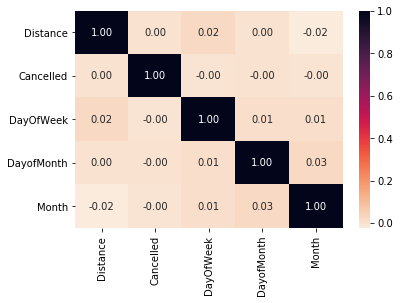

In [29]:
sb.heatmap(df_cancellation[hm_columns2].corr(), cmap='rocket_r', annot=True, fmt='.2f');

Once again there is no correlation being displayed from the correlation matrix. This illustrates the random nature of cancellations - which is good as this shows nothing unfair may be leading cancellations.

#### Average delays across different months for different causes of delays

In [33]:
#Creating dataframes that will group each delay by month, then calculate average delay for each
carrier_delay_month = df.query('CarrierDelay>0').groupby('Month')['CarrierDelay'].mean().reset_index(name='Carrier Delay')
weather_delay_month = df.query('WeatherDelay>0').groupby('Month')['WeatherDelay'].mean().reset_index(name='Weather Delay')
nas_delay_month = df.query('NASDelay>0').groupby('Month')['NASDelay'].mean().reset_index(name='NAS Delay')
security_delay_month = df.query('SecurityDelay>0').groupby('Month')['SecurityDelay'].mean().reset_index(name='Security Delay')
lateaircraft_delay_month = df.query('LateAircraftDelay>0').groupby('Month')['LateAircraftDelay'].mean().reset_index(name='Late Aircraft Delay')

In [34]:
#Joining all these dataframes into one
delays_mean_month = carrier_delay_month.merge(weather_delay_month, on='Month')
delays_mean_month = delays_mean_month.merge(nas_delay_month,on='Month')
delays_mean_month = delays_mean_month.merge(security_delay_month,on='Month')
delays_mean_month = delays_mean_month.merge(lateaircraft_delay_month,on='Month')

In [35]:
delays_mean_month

,Month,Carrier Delay,Weather Delay,NAS Delay,Security Delay,Late Aircraft Delay
0,1,35.497152,41.633032,26.927813,17.972721,44.345949
1,2,36.460605,46.252117,26.153957,17.244760,46.233156
2,3,34.827634,45.598372,26.627412,17.877323,45.474916
3,4,34.274011,44.702608,26.140385,18.663851,43.383066
4,5,33.189507,44.977880,26.205891,16.814388,42.264940
5,6,36.399788,47.131147,30.829889,19.001848,48.876826
6,7,35.866564,45.603814,27.736903,20.411869,48.052076
7,8,36.214010,47.776216,28.194377,18.857293,47.307429
8,9,38.296736,47.351170,25.572667,24.077088,41.680329
9,10,34.762583,43.237415,27.188917,20.443662,41.044224


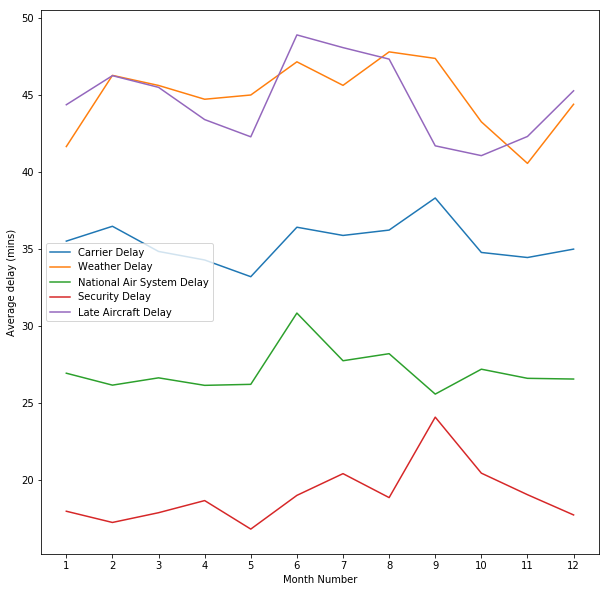

In [36]:
plt.figure(figsize=(10,10))
plt.errorbar(x=delays_mean_month.Month, y=delays_mean_month['Carrier Delay'])
plt.errorbar(x=delays_mean_month.Month, y=delays_mean_month['Weather Delay'])
plt.errorbar(x=delays_mean_month.Month, y=delays_mean_month['NAS Delay'])
plt.errorbar(x=delays_mean_month.Month, y=delays_mean_month['Security Delay'])
plt.errorbar(x=delays_mean_month.Month, y=delays_mean_month['Late Aircraft Delay'])

plt.xlabel('Month Number')
plt.ylabel('Average delay (mins)')
plt.legend(['Carrier Delay','Weather Delay','National Air System Delay','Security Delay', 'Late Aircraft Delay']);
plt.xticks(delays_mean_month.Month);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Very interesting to observe september had the highest departure delays due to securtiy. This may be due to inreased security checks to prevent a terrorist attack such as 9/11.
Late aircarft and weather delays were on average the highest departure delays.
Summer and fall have increased flight delay times compared to the winter and spring months.

### Were there any interesting or surprising interactions between features?

I expected carrier delays to be just as high as weather delays since they were two of the highest causes of cancellations, however there is almost a 10 minute gap in delays.

## Conclusions
- Febuary was the month with the most cancellaitons
- Atalanta was the airport with the most cancellations
- Saturday was the day where the least flights occured
- Envoy Air and American Airlines were the airlines who most often cancelled their flights
- Summer and fall have increased flight delay times compared to the winter and spring months.
